Idea de usar contornos: Rectangulos

In [659]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

plt.style.use('dark_background') 

path = '/Users/carlosalvarado/Desktop/ComputerVision/proyecto1/fotos_placas/'
filename = path+'placa4.jpg'
im = cv.imread(filename)

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)


(330, 600)


In [660]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)
    if title:
        plt.title(title)   
    plt.axis('off')
    plt.show()

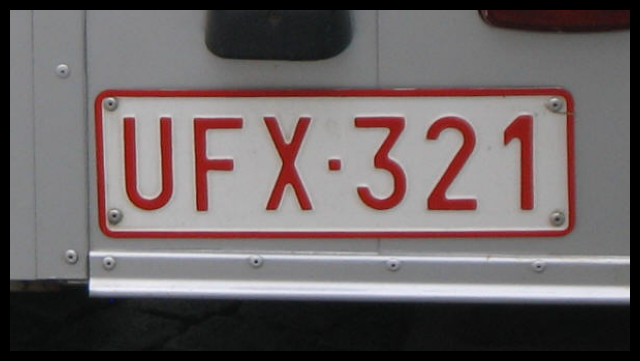

In [661]:
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
cvlib.imgview(img)

In [662]:
im = cv.imread(filename)
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# floddfill
im_floodfill = imgray.copy()
D = 65
cv.floodFill(im_floodfill, None, (0 ,0), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
# adaptive Th
imgbin = cv.adaptiveThreshold(im_floodfill, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(330, 600)


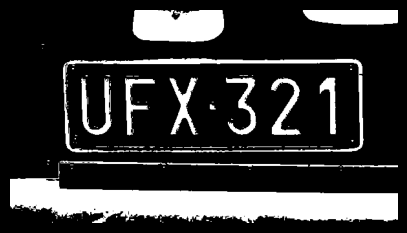

In [663]:
view(imgbin)

In [664]:
contorno = []
area_media = 0
count = 0

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    area_media = area_media + cv.contourArea(approx)
    count = count + 1

area_media = (area_media/count)


for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>area_media+30): #pongo el mínimo del área
        area = cv.contourArea(c)
        x,y,w,h = cv.boundingRect(c)
        rect_area = w*h
        extent = float(area)/rect_area
        if (extent > 0.0 and extent < 0.9): #pongo el mínimo del área
            contorno.append(c)
print(len(contorno))
print(area_media)

6
88.03956834532374


In [665]:
colores = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno)):
    #print(f"{w}, {h}")
    colores.update({cnt:(0,255,0)})
    indexes.append(cnt)

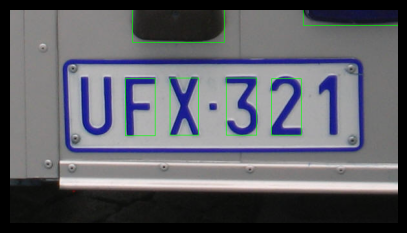

In [666]:
r = im.copy()
# cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
for c in indexes:
    x,y,w,h = cv.boundingRect(contorno[c])
    r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],1)
view(r)

Idea con tema de: Hough

(330, 600)


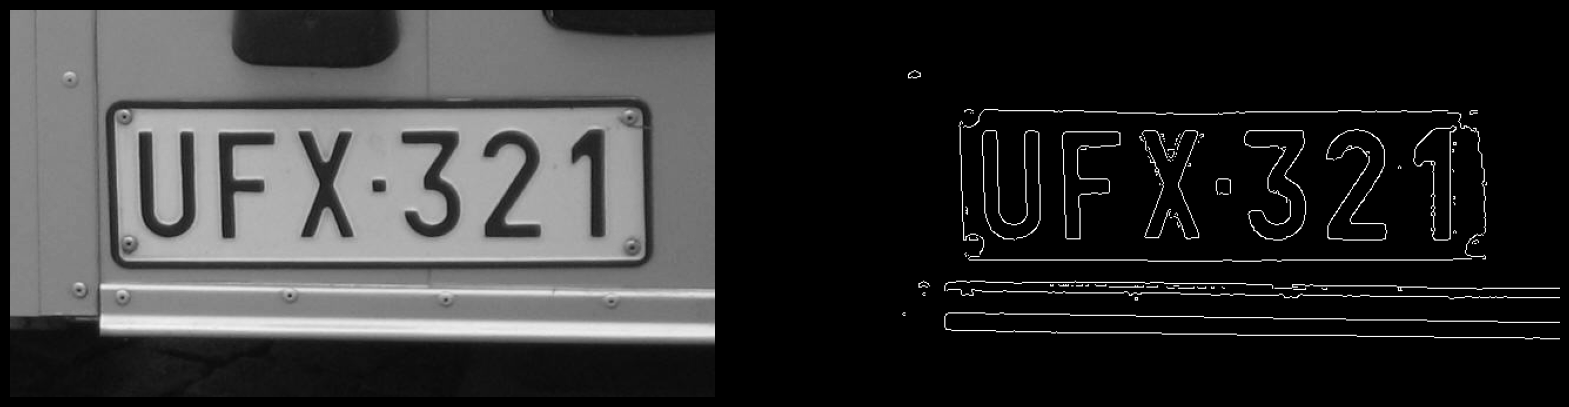

In [667]:
import math

img = cv.imread(filename,cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 1)


print(img.shape[:2])
# # floddfill
# im_floodfill = gray.copy()
# D = 30
# cv.floodFill(im_floodfill, None, (10 ,10), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
# adaptive Th
edges = cv.threshold(gray,150,255,cv.THRESH_BINARY)[1]
edges = cv.Canny(edges, 100, 200, apertureSize=3)
cvlib.imgcmp(gray,edges)

lines = cv.HoughLines(edges, 1, np.pi/180, 230, None, 0, 0)

In [668]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(edges, mode, method[1])

contorno = []

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>120): #pongo el mínimo del área
        area = cv.contourArea(c)
        x,y,w,h = cv.boundingRect(c)
        rect_area = w*h
        extent = float(area)/rect_area
        if (extent > 0 and extent < 0.99): #pongo el mínimo del área
            contorno.append(c)
len(contorno)



5

In [669]:
colores = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno)):
    #print(f"{w}, {h}")
    colores.update({cnt:(255,0,0)})
    indexes.append(cnt)

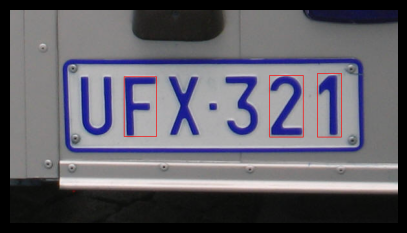

In [670]:
r = im.copy()
# cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
for c in indexes:
    x,y,w,h = cv.boundingRect(contorno[c])
    r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],1)
view(r)